# Pre-lecture

# 1. Explain succinctly in your own words (but working with a ChatBot if needed)...

### a) The difference between Simple Linear Regression and Multiple Linear Regression; and the benefit the latter provides over the former

### b) the difference between using a continuous variable and an indicator variable in Simple Linear Regression; and these two linear forms

### c) the change that happens in the behavior of the model (i.e., the expected nature of the data it models) when a single indicator variable is introduced alongside a continuous variable to create a Multiple Linear Regression; and these two linear forms (i.e., the Simple Linear Regression versus the Multiple Linear Regression)

### d) the effect of adding an interaction between a continuous and an indicator variable in Multiple Linear Regression models; and this linear form

### e) the behavior of a Multiple Linear Regression model (i.e., the expected nature of the data it models) based only on indicator variables derived from a non-binary categorical variable; this linear form; and the necessarily resulting binary variable encodings it utilizes

a) The difference between Simple Linear Regression (SLR) and Multiple Linear Regression (MLR) is that they have a different number of predictors used for each. SLR involves only one independent variable to predict the dependent variable. Whereas the MLR model involves two or more independent variables to predict the dependent variable. The model tries to find a hyperplane that best fits the data points in a higher-dimensional space. The MLR model has an improved prediction accuracy because it considers additional predictors, which can explain more variation in the dependent variable. Additionally, there is reduced bias because it includes relevant predictors which can reduce omitted variable bias, making the model’s predictions more reliable.

b) A continuous variable in SLR takes on a range of numerical values, representing a variable that can be measured on a continuum, therefore when used as the predictor in SLR, the model estimates how each one-unit increase in this continuous predictor changes the outcome variable. Whereas an indicator variable is a binary (0 or 1) variable used to represent categories, such as group membership. When it is used as a predictor, it allows the model to estimate a different mean outcome for each category it represents. Therefore continuous variables are used when you expect a gradual, proportional change, while indicator variables are used to distinguish between discrete groups.

c) When a single indicator variable is introduced alongside a continuous variable in a MLR model, the model gains the ability to capture interactions or shifts in the relationship between the continuous variable and the outcome based on the indicator. This setup allows the model to produce separate baseline outcomes (intercepts) for each group, effectively modeling two parallel lines—one for each group defined by the indicator variable—with a shared slope based on the continuous variable. However, a SLR with only a continuous predictor assumes a single trend across all data points, missing any group-level differences. The inclusion of the indicator variable in MLR thus enables the model to represent both the overall effect of the continuous variable and the specific shift in baseline outcomes for each group, making it more flexible and accurate when subgroup differences are present in the data.

d) Adding an interaction between a continuous variable and an indicator variable in a Multiple Linear Regression model allows each group to have its own slope, meaning the effect of the continuous predictor differs by group. This adjustment creates non-parallel lines, capturing variations in the continuous predictor’s impact across groups, which a standard MLR without interaction cannot model.

e) A MLR model based solely on indicator variables derived from a non-binary categorical variable captures differences in the outcome across multiple distinct groups, without assuming any continuous trend. This setup uses dummy (one-hot) encoding, where each category is represented by a separate binary (0 or 1) indicator variable, except for one baseline category. Each indicator variable thus corresponds to a specific category, and the model estimates the change in the outcome for each category relative to this baseline. By using binary encodings, the MLR model provides an intercept-adjusted outcome prediction for each category, reflecting discrete, categorical differences rather than any continuous trend. 

### CHAT SUMMARY THUS FAR 
    
We discussed differences in linear regression models, focusing on the roles of continuous and indicator variables in Simple and Multiple Linear Regression (MLR). Simple Linear Regression uses a single predictor, while MLR can include multiple predictors, offering greater flexibility. Adding an indicator variable to MLR allows the model to differentiate intercepts across groups, and including an interaction term enables each group to have its own slope, reflecting differences in the continuous predictor’s effect across groups.

For models with only indicator variables derived from a non-binary categorical variable, MLR uses one-hot encoding to represent each category. This allows the model to capture unique group effects relative to a baseline, without implying a continuous trend. This approach models the discrete differences across categories rather than any linear progression.

# 2.

# 3.

# 4. Explain the apparent contradiction between the factual statements regarding the fit below that "the model only explains 17.6% of the variability in the data" 
# while at the same time "many of the coefficients are larger than 10 while having strong or very strong evidence against the null hypothesis of 'no effect'"

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [3]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        21:13:21   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The apparent contradiction between a low R^2 value (indicating the model explains only 17.6% of the variance in HP) and strong, statistically significant coefficients can be understood by recognizing that these metrics address different aspects of the model. R^2 measures the overall explanatory power and an R^2 of 17.6% (considered low) suggests that a large portion of the variability in HP remains unexplained by the model, implying that other factors not included in the model may influence HP. Meanwhile, low p-values indicate that the predictors included are statistically significant, meaning they have a meaningful effect on HP despite not fully explaining its variability. Using "Generation" as a categorical predictor with interactions helps capture differences between groups but does not necessarily raise R^2, as it highlights group distinctions rather than fully explaining HP. Thus, R^2 assesses the model’s fit, while p-values and coefficient sizes reflect each predictor's impact. Together, these metrics provide complementary insights.

### Chat summary and link for everything until this point: https://chatgpt.com/share/6734f6f1-30e8-8003-9aa7-a3956d2b3f5f

We discussed interpreting Multiple Linear Regression (MLR) metrics, particularly how to reconcile a low R^2 value with statistically significant coefficients. We noted that R^2 measures the overall explanatory power of the model, with a low R^2 indicating that much variability in the outcome variable remains unexplained. In contrast, p-values test the significance of each predictor, and low p-values indicate that the predictors are impactful within the model despite not fully explaining the outcome's variability.

We also examined how adding an indicator variable, especially with interaction terms, can capture differences between groups. Treating "Generation" as a categorical variable helps model group distinctions without necessarily increasing R^2. Finally, I simplified a detailed paragraph for clarity, condensing redundant explanations and emphasizing how R^2 and p-values offer complementary insights on model fit and predictor impact.

# post lecture 

# 5. Discuss the following (five cells of) code and results with a ChatBot and based on the understanding you arrive at in this conversation explain what the following (five cells of) are illustrating

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


In [5]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        21:13:27   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


In [7]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        21:13:28   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

In [8]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


1st cell: introduced libraries, prepares the dataset for evaluating model generalizability by splitting it into pokeaman_train and pokeaman_test. Using separate datasets for training and testing allows us to examine how well the model performs on new data versus the data it was trained on. The aim is to detect potential overfitting.

2nd cell: Builds a simple linear regression model with HP as the dependent variable, predicted by Attack and Defense, and model's summary will show us initial insights, like coefficients and the "in-sample" R-squared, representing the proportion of variation in HP that this simpler model explains on the training data

3rd cell: calculates the "in-sample" R-squared for the baseline model using the training data. This R-squared measures how well HP is explained by the model within the same dataset used to train it, which is often relatively high. Then calculates the "out-of-sample" R-squared on the testing data, giving insight into how the model generalizes to new data. If this R-squared is substantially lower than the in-sample R-squared, it would suggest overfitting, as the model performs poorly outside its training context.

4th cell: introduces a more complex model with several interactions to capture relationships among additional predictors like Speed, Legendary, and special attributes (Sp. Def and Sp. Atk). By increasing complexity, the model may improve its "in-sample" fit on pokeaman_train, potentially achieving a higher R-squared, as it accounts for more variance within the training data.

5th cell: evaluates the more complex model similarly to Cell 3, calculating both the "in-sample" and "out-of-sample" R-squared values. If the model performs comparably well on both training and testing data, it’s likely to generalize better. A significant drop in "out-of-sample" R-squared relative to "in-sample" R-squared would indicate overfitting, suggesting that the additional complexity made the model more specialized to the training data, reducing its effectiveness on new data.

These cells illustrate the process of model evaluation for generalizability by contrasting "in-sample" and "out-of-sample" R-squared metrics. They demonstrate how adding complexity (from baseline to complex model) can improve in-sample fit but may lead to overfitting, highlighted by a potential decrease in out-of-sample R-squared. This workflow is foundational in machine learning to ensure that the model not only fits the data it was trained on but also performs reliably on unseen data.

# 6. Work with a ChatBot to understand how the model4_linear_form (linear form specification of model4) creates new predictor variables as the columns of the so-called "design matrix" model4_spec.exog (model4_spec.exog.shape) used to predict the outcome variable model4_spec.endog and why the so-called multicollinearity in this "design matrix" (observed in np.corrcoef(model4_spec.exog)) contribues to the lack of "out of sample" generalization of predictions from model4_fit; then, explain this consisely in your own works

This question focuses on understanding model complexity, multicollinearity, and generalizability by examining the design matrix (model4_spec.exog) used in Model 4, particularly through the concept of the condition number and centering/scaling of predictor variables.

The complexity of Model 4 introduces a large design matrix with highly correlated predictor terms, leading to multicollinearity. This multicollinearity, signaled by an extremely high condition number, undermines the model's stability and generalizability. As a result, Model 4 fits noise in the training data rather than true patterns, causing it to perform poorly on new data. Centering and scaling help reduce some numerical artifacts but don’t fully resolve the multicollinearity. In contrast, simpler models like Model 3 avoid overfitting by focusing on stronger, more reliable associations that generalize well across datasets.

# 7. Discuss with a ChatBot the rationale and principles by which model5_linear_form is extended and developed from model3_fit and model4_fit; model6_linear_form is extended and developed from model5_linear_form; and model7_linear_form is extended and developed from model6_linear_form; then, explain this breifly and consisely in your own words

In [9]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215
'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933
'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


### The rationale and principles by which model5_linear_form is extended and developed from model3_fit and model4_fit

The rationale for how model5_linear_form is extended and developed from model3_fit and model4_fit is on the baseline model (Model 3) by incorporating additional relevant predictors (Speed, Sp. Def, Sp. Atk) and categorical variables (Generation, Type 1, Type 2), similar to Model 4. This extension purpose is to improve predictive accuracy without overwhelming complexity. As for the principles for the extension and development, model 5 leverages a balanced expansion approach, adding predictors that contribute meaningful variation without creating excessive multicollinearity or overfitting. It combines key variables from the simpler Model 3 and more complex Model 4 in a controlled way to enhance generalizability.

### model6_linear_form is extended and developed from model5_linear_form

The rationale behind the extension and development from model5_linear_form is that model 6 tries to simplify model 5 by including only the most significant predictors from Model 5, such as certain types and generations, while excluding predictors that showed less relevance. The principle is that this model prioritizes parsimony (favouring a simpler model with fewer parameters over more complex models as long as the models fit the data similarly well), refining the model to include only statistically significant terms. By doing so, Model 6 improves fit without the risk of multicollinearity, aiming to capture core predictive relationships with minimal complexity. 

### model7_linear_form is extended and developed from model6_linear_form

The rationale behind the extension and development from model6_linear_form to model 7 is that model 7 builds on model 6 by reintroducing the interaction terms between core variables (Attack, Speed, Sp. Def, Sp. Atk) while keeping key categorical indicators. This model tests for any non-linear relationships among predictors that might improve predictive power. The principle is that this model is guided by controlled complexity with interaction terms, and it strategically adds complexity where evidence suggests it might improve prediction, yet without leading to severe multicollinearity (condition number remains reasonable after centering and scaling).

With each new model, it aims to improve the generalizability and predicitive accuracy by adding complexity specifically in areas where it is supported by evidence.

# 8. Work with a ChatBot to write a for loop to create, collect, and visualize many different paired "in sample" and "out of sample" model performance metric actualizations (by not using np.random.seed(130) within each loop iteration); and explain in your own words the meaning of your results and purpose of this demonstration

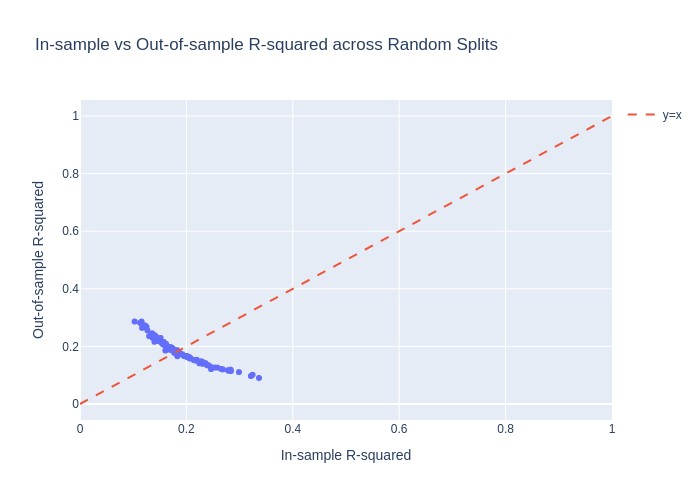

In [16]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Set parameters
reps = 100
in_sample_Rsquared = np.zeros(reps)
out_of_sample_Rsquared = np.zeros(reps)

# Specify the model formula (e.g., from model3)
linear_form = 'HP ~ Attack + Defense'

for i in range(reps):
    # Create a random 50-50 train-test split each iteration
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Fit the model
    final_model_fit = smf.ols(formula=linear_form, data=pokeaman_train).fit()
    
    # Calculate and store "in-sample" R-squared
    in_sample_Rsquared[i] = final_model_fit.rsquared
    
    # Calculate and store "out-of-sample" R-squared
    y_test = pokeaman_test.HP
    yhat_test = final_model_fit.predict(pokeaman_test)
    out_of_sample_Rsquared[i] = np.corrcoef(y_test, yhat_test)[0, 1] ** 2

# Convert results to a DataFrame for visualization
df = pd.DataFrame({
    "In Sample Performance (R-squared)": in_sample_Rsquared,
    "Out of Sample Performance (R-squared)": out_of_sample_Rsquared
})

# Create the scatter plot with Plotly
fig = px.scatter(df, x="In Sample Performance (R-squared)", y="Out of Sample Performance (R-squared)",
                 title="In-sample vs Out-of-sample R-squared across Random Splits")
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode="lines", name="y=x", line=dict(dash="dash")))
fig.update_layout(xaxis_title="In-sample R-squared", yaxis_title="Out-of-sample R-squared")
fig.show(renderer='png')

# 9. Work with a ChatBot to understand the meaning of the illustration below; and, explain this in your own words

In [11]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.00018905947734540018 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)


In [12]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.00018905947734540018 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)


In [13]:
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.0003901627672308394 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)


In [14]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.0003901627672308394 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178799936 (gen1to5_predict_future)


### code explanation

Overall, the code above illustrates the concept of temporal generalization and model performance across generations in the Pokémon dataset by analyzing how well models trained on early generations (e.g., Generation 1 or Generations 1–5) generalize to future generations (e.g., Generation 6).

In the first step of the code, the code defines and fits model 7 and 6 on specific subsets (Generation 1 only tests how a model trained on the oldest generation performs on future generations)(Generations 1–5 test how a model trained on all but the latest generation (Generation 6) perform on unseen, newer data). Then, it prints the "in-sample" and "out-of-sample" R-squared values for the original model (e.g., model7_fit and model6_fit) on the full training and testing datasets, and these values give a baseline performance measure when the model is trained on a representative sample of all generations. Then, in the next step, it calculates "In-Sample" R-Squared on the subset data which indicates how well the model fits the specific subset of generations it was trained on. Afterwards, it calculates "Out-of-Sample" R-Squared on future generations not included in the training data (Generations 2–6 for the first model and Generation 6 for the second). This measures how well the subset-trained models generalize to new generations. Therefore, this code tests the temporal generalizability of models by training them on older data and evaluating their predictive power on newer generations. It helps reveal if models can maintain performance across different time periods, indicating the strength of the model’s predictive associations over time.

### chat summary (Q5-Q9):
### chat link: https://chatgpt.com/share/67366394-14a0-8003-a2ba-15444d4eeb5d

In this chat, we analyzed a series of increasingly complex models (`model3`, `model4`, `model5`, `model6`, and `model7`) used to predict Pokémon characteristics, specifically focusing on understanding the principles of model building, generalizability, and multicollinearity. We started by exploring the basics of "in-sample" and "out-of-sample" R-squared metrics, noting how these metrics highlight overfitting when the "in-sample" R-squared is much higher than the "out-of-sample" R-squared. Next, we delved into multicollinearity within design matrices, using the condition number as a diagnostic tool to assess its impact on model performance, particularly for `model4`, which exhibited severe multicollinearity and poor generalizability.

From there, we discussed the incremental development of models: how `model5` builds on `model3` and `model4` by balancing complexity and simplicity, how `model6` refines `model5` by adding statistically significant predictors, and how `model7` extends `model6` by adding selected interactions to capture more nuanced relationships. We then implemented a loop to repeatedly fit models across random train-test splits, collecting "in-sample" and "out-of-sample" R-squared values to assess model stability across different data splits, revealing how variability in sampling affects performance metrics and can influence perceptions of model robustness.

Finally, we examined temporal generalizability by training `model6` and `model7` on specific subsets of Pokémon generations (e.g., only Generation 1 or Generations 1–5) and testing their predictions on later generations. This exercise demonstrated the challenges of generalizing across time when trained on limited data and underscored the importance of using diverse data for models intended to predict across varied or evolving datasets. Throughout, we emphasized balancing complexity with parsimony and using statistical diagnostics to guide model improvement, aiming to achieve both accurate and generalizable models.